## An experimentation of Object Detection technologies

Just testing out a few trending and SOTA models on object and face detection to understand them. This will enable me to get useful insights on their use cases then implement optimal model for my problem.

In [1]:
import torch
import torchvision
from matplotlib import pyplot as plt
import numpy as np
from ultralytics import YOLO
from ultralytics.yolo.utils import ops
import cv2
import time
import os
from uuid import uuid1

In [24]:
# load a pretrained YOLO v8 model from ultralytics
model = YOLO('yolov8s.pt') # 'yolov8n.yaml' for new model from scratch
# model2 = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT)
print (model.metrics)

None


In [3]:
IMAGES_TO_TRAIN = "/home/ashmitbhattarai/Codes/face_detection_model_family/data/images"
labels = ["ramukaka"]
number_images = 20

## Collecting Training and Val Data

In [14]:


# if cam:
#     cam.release()
#     cv2.destroyAllWindows()
cam = cv2.VideoCapture(0)
if (cam.isOpened() == False): 
    print("Error reading video file")
    cam.release()
    cv2.destroyAllWindows()
else:
    try:
        for label in labels:
            print (f"capturing Images for {label}")
            time.sleep(5)
            for i in range(number_images):
                ret, frame = cam.read()
                imagename = str(uuid1())+".jpg"
                file_folder = os.path.join(IMAGES_TO_TRAIN,label)

                filepath = os.path.join(file_folder,imagename)
                print (filepath,f"writing file for {label}",i)
                cv2.imshow("Data Capture",frame)
                cv2.imwrite(filepath,frame)
                time.sleep(5)

        cam.release()
        cv2.destroyAllWindows()
    except Exception as e:
        print (e)
        cam.release()
        cv2.destroyAllWindows()



capturing Images for ramukaka
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ramukaka/0d554b90-06b2-11ee-971b-4851c5e7243a.jpg writing file for ramukaka 0
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ramukaka/10521652-06b2-11ee-971b-4851c5e7243a.jpg writing file for ramukaka 1
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ramukaka/134e0528-06b2-11ee-971b-4851c5e7243a.jpg writing file for ramukaka 2
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ramukaka/1649fb92-06b2-11ee-971b-4851c5e7243a.jpg writing file for ramukaka 3
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ramukaka/1945f558-06b2-11ee-971b-4851c5e7243a.jpg writing file for ramukaka 4
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ramukaka/1c41ebf4-06b2-11ee-971b-4851c5e7243a.jpg writing file for ramukaka 5
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ramukaka/1f3dfd48-06b2-11e

In [ ]:
# model.model # to display the architechture of the model itself
# results = model(url/path of the iamge)
# results.print()

# Printing the evaluated image
#plt.imsshow(np.squeeze(results.render())) # np.squeeze here actually remove outer 1 dim array and 
# plt.show()

### the read coding begins here
#### testing the camera using different models
cam = cv2.VideoCapture(0)

while cam.isOpened():
    ret, frame = cam.read()
    results = model(frame)
    cv2.imshow("YOLO",np.squeeze(results[0].plot()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam.release()

cv2.destroyAllWindows()


## Train the model

In [25]:
from datetime import datetime
model_path = "src/yolov8s.pt"
#
#  labelling images
# https://labelstud.io/guide/get_started.html#Quick-start
# pip install label-studio
# training the Yolov8 model
project_name = "face_detection_family_friends_strangers"
experiment_name = str(model_path.split("/")[-1])\
    + "_" + datetime.now().strftime("%Y_%m_%d-%H_%M")
experiment_name = experiment_name.replace(".","_")
dataset_yaml = "../dataset.yaml"
model.train(data=dataset_yaml,epochs=3,batch=16,imgsz=320,workers=1,agnostic_nms=True,conf=0.7,project=project_name,name=experiment_name) # workers is causing bit of a problem in Pytorch now

New https://pypi.org/project/ultralytics/8.0.119 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.114 🚀 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 7966MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=../dataset.yaml, epochs=3, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=1, project=face_detection_family_friends_strangers, name=yolov8s_pt_2023_06_18-14_46, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.7, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualiz

## Load Custom model

In [9]:
new_model = YOLO('/home/ashmitbhattarai/Codes/face_detection_model_family/face_detection_model/yolov8s_pt_2023_06_16-00_55/weights/last.pt')

In [ ]:
cam = cv2.VideoCapture(0)

while cam.isOpened():
    ret, frame = cam.read()
    results = new_model(frame,agnostic_nms=True)
    cv2.imshow("YOLO",np.squeeze(results[0].plot()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam.release()

cv2.destroyAllWindows()


image 1/1 /home/ashmitbhattarai/Codes/IMG-2077.jpg: 256x320 2 chandres, 2 glassess, 1 ramesh, 1 sajina, 1 samjhu, 4.2ms
Speed: 0.6ms preprocess, 4.2ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)


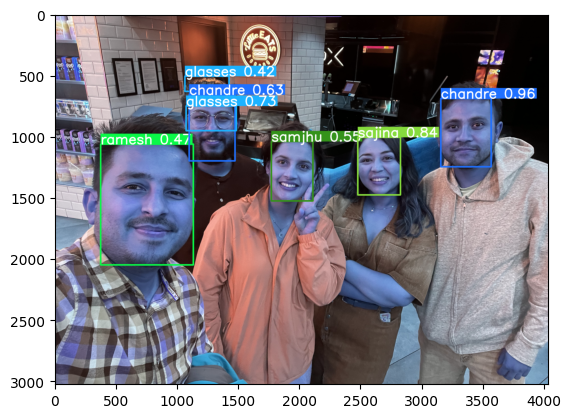

In [22]:
%matplotlib inline
result = new_model('/home/ashmitbhattarai/Codes/IMG-2077.jpg',agnostic_nms=True)
# print (result[0])
plt.imshow(np.squeeze(result[0].plot()))
plt.show()

## Implementing Region based Native Tracking and Counting using supervision on YOLOv8

In [22]:
# !pip install supervision
import supervision as sv
import pickle
# result = new_model(source=0,show=True)

model_data = model.metrics.__dict__
model_data["model_name"] = "test"
# model
del model_data["on_plot"]
pickle.dump(
        model_data,
        open(
            "metrics.pickle",
            "wb"
        ),
        protocol=pickle.HIGHEST_PROTOCOL
    )
    

In [23]:
model.metrics.__dict__

{'save_dir': PosixPath('face_detection_family_friends_strangers/yolov8s_pt_2023_06_18-14_36'),
 'plot': True,
 'names': {0: 'alishma',
  1: 'ashmit',
  2: 'chandre',
  3: 'glasses',
  4: 'pradip',
  5: 'ramesh',
  6: 'sabin',
  7: 'sajina',
  8: 'samjhu',
  9: 'stranger'},
 'speed': {'preprocess': 0.024636586507161457,
  'inference': 0.759619253653067,
  'loss': 0.00018543667263454862,
  'postprocess': 0.17295943366156685},
 'model_name': 'test'}

In [26]:
metrics = model.val(split='test')

Ultralytics YOLOv8.0.114 🚀 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 7966MiB)
val: Scanning /home/ashmitbhattarai/Codes/face_detection_model_family/data/prepared/test/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]
val: WARNING ⚠️ /home/ashmitbhattarai/Codes/face_detection_model_family/data/prepared/test/images/39549fe8-20230603_141503.jpg: corrupt JPEG restored and saved
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]
                   all         18         32      0.852      0.681      0.782      0.551
                ashmit         18          3          1      0.333      0.667      0.467
               chandre         18          2      0.667          1      0.995      0.754
               glasses         18         10          1        0.3       0.65      0.368
                pradip         18          2          1          1  

In [35]:
str(metrics.save_dir)

'face_detection_family_friends_strangers/yolov8s_pt_2023_06_15-23_384'

In [25]:
model.val()

Ultralytics YOLOv8.0.114 🚀 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 7966MiB)
val: Scanning /home/ashmitbhattarai/Codes/face_detection_model_family/data/prepared/val/labels.cache... 27 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<?, ?it/s]
val: WARNING ⚠️ /home/ashmitbhattarai/Codes/face_detection_model_family/data/prepared/val/images/592d3525-20221024_175453.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/ashmitbhattarai/Codes/face_detection_model_family/data/prepared/val/images/72d87418-20230603_141638.jpg: corrupt JPEG restored and saved
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]
                   all         27         49      0.936      0.659       0.81      0.539
               alishma         27          2          1        0.5       0.75      0.375
                ashmit         27          4          1        0.5       0.75      0.474


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7ff3671c2b10>
fitness: 0.566009705883997
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([      0.375,       0.474,     0.31691,     0.38094,     0.70082,      0.7715,     0.73356,     0.48483,       0.675,     0.47592])
names: {0: 'alishma', 1: 'ashmit', 2: 'chandre', 3: 'glasses', 4: 'pradip', 5: 'ramesh', 6: 'sabin', 7: 'sajina', 8: 'samjhu', 9: 'stranger'}
plot: True
results_dict: {'metrics/precision(B)': 0.9357142857142857, 'metrics/recall(B)': 0.6586274509803921, 'metrics/mAP50(B)': 0.8104751515151515, 'metrics/mAP50-95(B)': 0.5388468785916465, 'fitness': 0.566009705883997}
save_dir: PosixPath('face_detection_family_friends_strangers/yolov8s_pt_2023_06_15-23_383')
speed: {'prep

In [14]:
dataset_yaml = "../dataset.yaml"
new_model.val(data=dataset_yaml)

Ultralytics YOLOv8.0.114 🚀 Python-3.11.3 torch-2.0.1 CPU


FileNotFoundError: 
Dataset '../dataset.yaml' images not found ⚠️, missing paths ['/home/ashmitbhattarai/Codes/face_detection_model_family/notebooks/datasets/prepared/val/images']
Note dataset download directory is '/home/ashmitbhattarai/Codes/face_detection_model_family/notebooks/datasets'. You can update this in '/home/ashmitbhattarai/.config/Ultralytics/settings.yaml'